In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
#email classification

In [14]:
df = pd.read_csv("9-email_classification_svm.csv")

In [15]:
df.head()   #email_type ->  1 = work email  0 = personal email
            #senaryonuz bu sınıflandırmayı yapmak

,subject_formality_score,sender_relationship_score,email_type
0,-1.496790,0.779258,0
1,-1.217610,0.889601,0
2,-0.375945,-0.823324,1
3,0.639609,-0.362827,1
4,-1.342836,-1.040502,1


In [16]:
df.describe()

,subject_formality_score,sender_relationship_score,email_type
count,1000.000000,1000.000000,1000.000000
mean,-1.009046,-0.006300,0.498000
std,0.654219,1.059501,0.500246
min,-3.532770,-2.218219,0.000000
25%,-1.252867,-1.006076,0.000000
50%,-0.994760,0.439233,0.000000
75%,-0.754839,0.994943,1.000000
max,2.180933,1.699497,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_formality_score    1000 non-null   float64
 1   sender_relationship_score  1000 non-null   float64
 2   email_type                 1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [18]:
df.isnull().sum()

subject_formality_score      0
sender_relationship_score    0
email_type                   0
dtype: int64

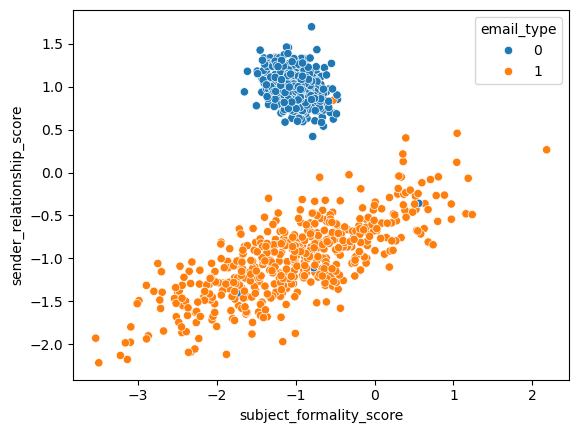

In [21]:
sns.scatterplot(x=df["subject_formality_score"], y=df["sender_relationship_score"], hue=df["email_type"])   #tertemiz data
plt.show()

In [23]:
df["email_type"].value_counts()

email_type
0    502
1    498
Name: count, dtype: int64

In [25]:
X = df.drop("email_type", axis=1)
y = df["email_type"]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [28]:
X_train

,subject_formality_score,sender_relationship_score
846,-1.076655,0.943601
969,-1.062554,1.148473
191,-0.904298,1.049447
711,-1.283609,-1.171544
967,-1.097239,1.388281
...,...,...
887,-1.153241,1.241387
645,-0.964472,1.235402
908,-0.862866,1.110327
757,-1.124572,0.967717


In [29]:
from sklearn.svm import SVC

In [31]:
svc = SVC(kernel="linear")

In [32]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [33]:
svc.coef_

array([[ 0.60318833, -1.91645213]])

In [34]:
y_pred = svc.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       117
           1       1.00      0.99      1.00       133

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[117   0]
 [  1 132]]
